# Introduction

In K-means clustering algorithm, we do not know the label of each data point. *The goal is to divide the data into different clusters so that the data in the same cluster have similar properties*.

**For example**: A company wants to create preferential policies for different groups of customers based on the interaction between each customer with that company (number of years as a customer; amount of money the customer has paid to the company; age; gender; city; occupation; …). Suppose that company has a lot of data of many customers but there is no way to divide all of those customers into different groups/clusters. If a person who knows Machine Learning is asked this question, the first method he/she will think of is K-means Clustering.

The simplest idea of ​​a cluster is a set of points that are close to each other in some space (this space can have many dimensions in case the information about a data point is very large). The figure below is an example of 3 data clusters (from now on I will abbreviate it as cluster).

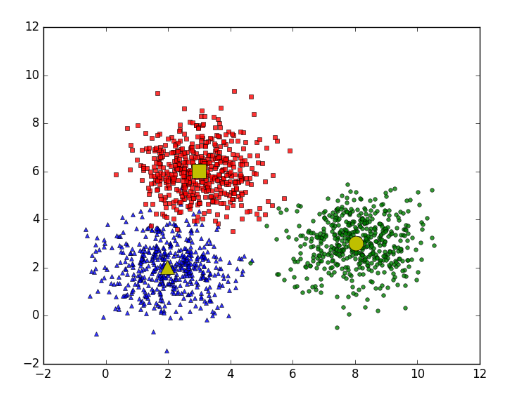

Suppose each cluster has a yellow center. And the points around each center belong to the same group as that center. In the simplest way, consider any point, we consider which center that point is closest to, then it belongs to the same group as that center. Now, we have an interesting problem: On a large square sea area, there are three yellow square, triangular, and circular islands as shown above. A point on the sea is said to belong to the territorial waters of an island if it is closer to this island than to the other two islands. **Determine the territorial waters of the islands.**

The figure below is an illustration of the division of territorial waters if there were five different islands represented by black circles:

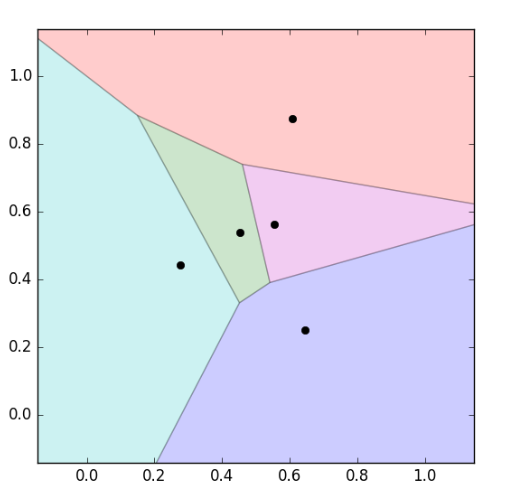

This way of analyzing in mathematics is called ***Voronoi Diagram***.

In three-dimensional space, for example planets, the space of each planet would be a *polyhedron*. In *higher-dimensional space*, we would have things (what I call) *hyper-polyhedra* (hyper-polygons).

# Mathematic Analysis

Suppose there is *N* data point $X = [x_1, x_2, \cdots, x_N] \in \mathbb{R}^{N \times d}$, and $K < N$ is the number of cluster we want to divide. We need to find centers $m_1, m_2, \cdots, m_k \in \mathbb{R}^{d \times 1}$ and labels of each datapoint.

With each data point $x_i$, set $y_i = [y_{i1}, y_{i2}, \cdots, y_{iK}]$ is the label of that data point, where $x_i$ belong to cluster $k$ then $y_{ik} = 1$ and $y_{ij} = 0, \forall j \neq k$. Beside, label to separated will lie in $0$ or $1$ then if we have a point, assume $[1, 0, 0, \cdots, 0]$, then cluster represent for it is cluster number 1: $[0, 1, 0, \cdots, 0]$ for 2, and so on. This called **one-hot encoding**.

We have the following constraints problem:

$$y_{ik} \in \{0, 1\}, \sum_{k = 1}^{K} y_{ik} = 1$$

### Cost function and optimization problem


If we consider center $m_k$ (or representative) of each cluster and estimate all points assigned to this cluster by $m_k$ then a point $x_i$ will be assigned to cluster $k$ will be $(x_i - m_k)$ and we want this "distance" will be the smallest:

$$\|x_i - m_k\|_2^2$$

Furthermore, because $x_i$ belong to cluster $k$ then $y_{ik} = 1, y_{ij} = 0, \forall j \neq k$ then:

$$y_{ik} \|x_i - m_k\|_2^2 = \sum_{j = 1}^{K} y_{ij} \|x_i - m_k\|_2^2$$

In words, we say that find the smallest "distance" ($\|x_i - m_k\|_2^2$) which belong to that cluster ($y_{ij}$), 0 if it assign to the cluster and 1 otherwise (currently based on distance). But there is more than just 1 cluster which is $\sum_{j = 1}^{K}$

Then, the cost function is (for all data):

$$\mathcal{L}(Y, M) = \sum_{i = 1}^{N} \sum_{j = 1}^{K} y_{ij} \|x_i - m_j\|_2^2$$

Where: $Y = [y_1, y_2, \cdots, y_N]$ and $M = [m_1, m_2, \cdots, m_K]$ are the label matrix and center matrix, respectively. And the optimization problem is:

$$Y, M = \arg \min_{Y, M} \mathcal{L}(Y, M) \\
\text{subject to: } y_{ij} \in \{0, 1\}, \sum_{j = 1}^{K} y_{ij} = 1$$

### Opimization problem

This problem belongs to the mix-integer programming category (conditions are integers) - ***a category that is very difficult to find a global optimal point*** (i.e. the solution that makes the loss function reach its smallest possible value). However, in some cases we can still find a method to find an approximate solution or a minimum point. (**If we still remember the math program for university entrance exams, the minimum point is not necessarily the point that makes the function reach its smallest value**).

##### Fix $M$, find $Y$

Assuming the centers are found, find the label vectors for which the loss function minimizes. This is equivalent to finding the cluster for each data point.


When the centers are fixed, the problem of finding label vectors for the entire data can be broken down into the problem of finding label vectors for each data point $x_i$ like below:

$$y_i = \arg \min_{y_i} \sum_{j = 1}^{K} y_{ij} \|x_i - m_j\|_2^2 \\
\text{subject to: } y_{ij} \in \{0, 1\}, \sum_{j = 1}^{K} y_{ij} = 1$$

Because only label $y_i = 1$ then it can be written as:

$$j = \arg \min_{j} \|x_i - m_j\|_2^2$$

Because $\|x_i - m_j\|_2^2$ is the square distance start from $x_i$ to center $m_j$, we can say **each $x_i$ belong to the closest cluster**. Then we can infer the label for each data

##### Fix $Y$, find $M$

**Assuming we have found clusters for each point, let's find new centers for each cluster so that the loss function minimizes.**

Once we have determined the label vector for each data point, the problem of finding centers for each cluster is reduced to:

$$m_j = \arg \min_{m_j} \sum_{i = 1}^N y_{ij}\|x_i - m_j\|_2^2$$

From here we solve the equation by derivative equal to 0, because the function to be optimized is a continuous function and has a derivative defined at every point. And more importantly, this function is a convex function 

Set $\mathcal{l}(m_j)$ is the function inside the sum of the loss function:

$$\frac{\partial \mathcal{l}(m_j)}{\partial m_j} = 2 \sum_{i = 1}^{N} y_{ij} (m_j - x_i)$$

Solving equation above by derivative and set it to zero, we have: 

$$m_j \sum_{i = 1}^{N} y_{ij} = \sum_{i = 1}^{N} y_{ij} x_i \\
\Rightarrow m_j = \frac{\sum_{i = 1}^{N} y_{ij} x_i}{\sum_{i = 1}^{N} y_{ij}}$$

The name K-means clustering also comes from here, because the center of each cluster is the mean of all points in that cluster.

### Problem in K-means

- We must need to know the number of clusters when using this
- The final result depends on the initial center of each cluster
- Clusters should have approximately equal number of points
- Clusters should be circular in shape.
- When a cluster is inside another cluster

Besides, K-means is a simple algorithm, easy to understand and implement. It is also very fast and efficient in practice. However, it is not suitable for all types of data. Also there's a lot of improvement for K-means algorithm such as K-means++.